# PART - A

<div>
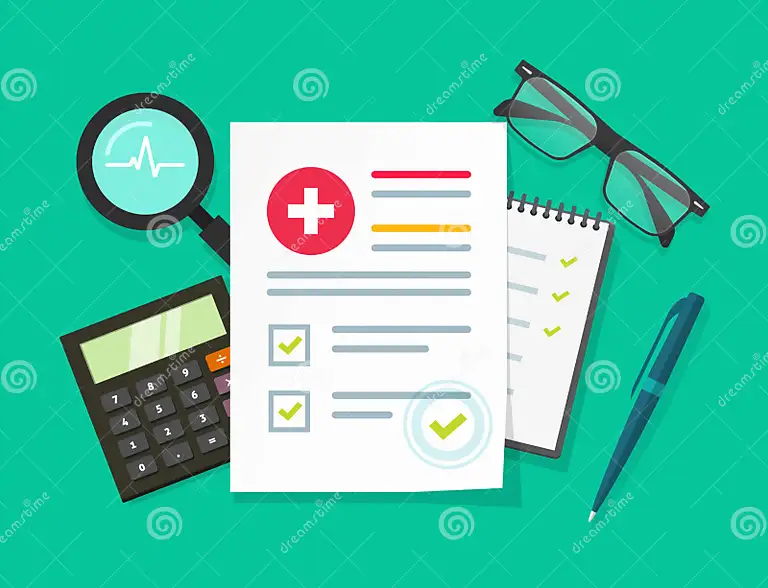
</div>

**DOMAIN** : Medical

**CONTEXT**: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

**DATA DESCRIPTION**: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part. 

**PROJECT OBJECTIVE**: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%cd C:\Users\ajays\Dropbox\PGP-AIML\projects\supervisedlearning

C:\Users\ajays\Dropbox\PGP-AIML\projects\supervisedlearning


## Data Understanding

### 1.1.a. Read the dataframes

In [2]:
df_normal = pd.read_csv('Normal.csv')
df_h = pd.read_csv('Type_H.csv')
df_s = pd.read_csv('Type_S.csv')

In [3]:
df_normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
df_h.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [5]:
df_s.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


### 1.1.b. Structure and shape of the dataframes

In [6]:
df_normal.shape

(100, 7)

In [7]:
df_h.shape

(60, 7)

In [8]:
df_s.shape

(150, 7)

* *There is a difference in the number of observations in each of the data sets provided. There are:*
<ol>
    <li><em><b>100</b> observations for <b>Normal</b> class</em></li>
    <li><em><b>60</b> observations for <b>Type_H</b> class</em></li>
    <li><em><b>150</b> observations for <b>Type_S</b> class</em></li>
</ol>

In [9]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [10]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [11]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


* *There are **no missing values** in the columns in all the 3 data sets*

### 1.1.c. Column analysis

In [12]:
df_normal.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [13]:
df_h.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [14]:
df_s.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [15]:
df_normal.columns == df_h.columns

array([ True,  True,  True,  True,  True,  True,  True])

In [16]:
df_h.columns == df_s.columns

array([ True,  True,  True,  True,  True,  True,  True])

* *All 3 data sets have **same column names***

### 1.1.d. Data types

In [17]:
df_normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [18]:
df_h.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [19]:
df_s.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

* *The **datatypes** for all columns in the 3 data sets **match for every column***

### 1.1.e. 'Class' feature analysis

In [20]:
df_normal['Class'].value_counts()

Class
Normal    73
Nrmal     27
Name: count, dtype: int64

In [21]:
df_h['Class'].value_counts()

Class
Type_H    37
type_h    23
Name: count, dtype: int64

In [22]:
df_s['Class'].value_counts()

Class
Type_S    133
tp_s       17
Name: count, dtype: int64

* *As already proven above, since there are no missing values, **every data point in all 3 data sets have a class value***
* ***df_normal** seems to have all rows **belonging to the 'normal' class**, but however has variation in the way class is represented. It has possible values of **['Nornal','Nrmal']***
* ***df_h** seems to have all rows **belonging to the 'Type H' class**, but however has variation in the way class is represented. It has possible values of **['Type_H','type_h']***
* ***df_s** seems to have all rows **belonging to the 'Type S' class**, but however has variation in the way class is represented. It has possible values of **['Type_S','tp_s']***

## Data Preparation and Exploration

### 1.2.a. 'Class' feature unification

We need to remove the variation in Class variable representation in the 3 data sets so we can define unique categories for every type. Let us consider the following types in the unified data sets:
* Class Normal as **Normal**
* Class Type H as **Type_H**
* Class Type S as **Type_S**

In [23]:
df_normal.loc[df_normal['Class'] != 'Normal', 'Class'] = 'Normal'

In [24]:
df_normal['Class'].value_counts()

Class
Normal    100
Name: count, dtype: int64

In [25]:
df_h.loc[df_normal['Class'] != 'Type_H', 'Class'] = 'Type_H'

In [26]:
df_h['Class'].value_counts()

Class
Type_H    60
Name: count, dtype: int64

In [27]:
df_s.loc[df_s['Class'] != 'Type_S', 'Class'] = 'Type_S'

In [28]:
df_s['Class'].value_counts()

Class
Type_S    150
Name: count, dtype: int64

### 1.2.b. Dataframe unification

We can now safely merge the rows of all 3 dataframes as we have no missing values, all column labels are same and represent the same thing and we have unified the Class field representation above.

In [29]:
df = pd.concat([df_normal, df_h, df_s])

In [30]:
df.shape

(310, 7)

### 1.2.c. Investigate unified dataframe

In [31]:
df.sample(n=5, random_state=1)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
78,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247,Normal
84,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133,Type_S
25,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,Type_S
70,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,Normal
20,43.922840,14.177959,37.832547,29.744881,134.461016,6.451648,Type_H


### 1.2.d. Null check and analysis

In [32]:
df.isnull().sum() / df.shape[0] * 100.00

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

* *There are **no missing values for any feature** in the unified dataframe*

### 1.2.e. 5-point summary

In [33]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


* *S_Degree feature seems to have a few outliers as the max value is very igh compared to the mean or the median.*
* *There are one or more **negative values** for **P_tilt** and **S_Degree**. Based on the name of the columns they could refer to angles with respect to a certain axis and hence seem to be valid values.*

## Data Analysis

### 1.3.a. Correlation heatmap

<Axes: >

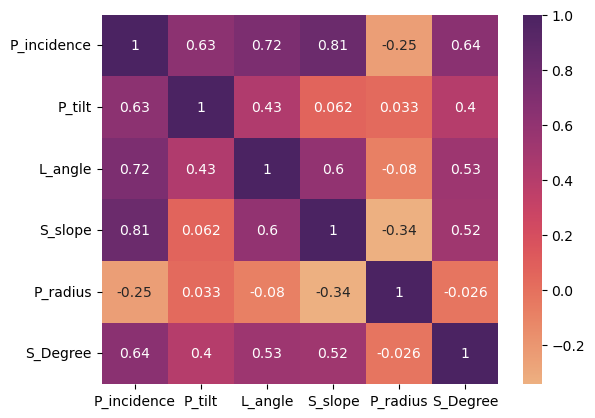

In [34]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='flare')

### 1.3.b. Correlation insights

***Stronger positive correlation** is seen for the following features:*
* *P_incidence and S_slope with a value of 0.81*
* *P_incidence and L_angle with a value of 0.72*
* *P_incidence and S_Degree with a value of 0.64*
* *P_incidence and P_tilt with a value of 0.63*

***Weaker positive correlation** is seen for the following features:*
* *P_tilt and S_slope with a value of 0.062*
* *P_tilt and P_radius with a value of 0.033*

**Weaker negative correlation** is seen for the following features:*
* *P_radius and S_Degree with a value of -0.026*
* *P_radius and L_angle with a value of -0.08*
* *P_radius and P_incidence with a value of -0.25*
* *P_radius and S_slope with a value of -0.34*

### 1.3.c. Pairplot

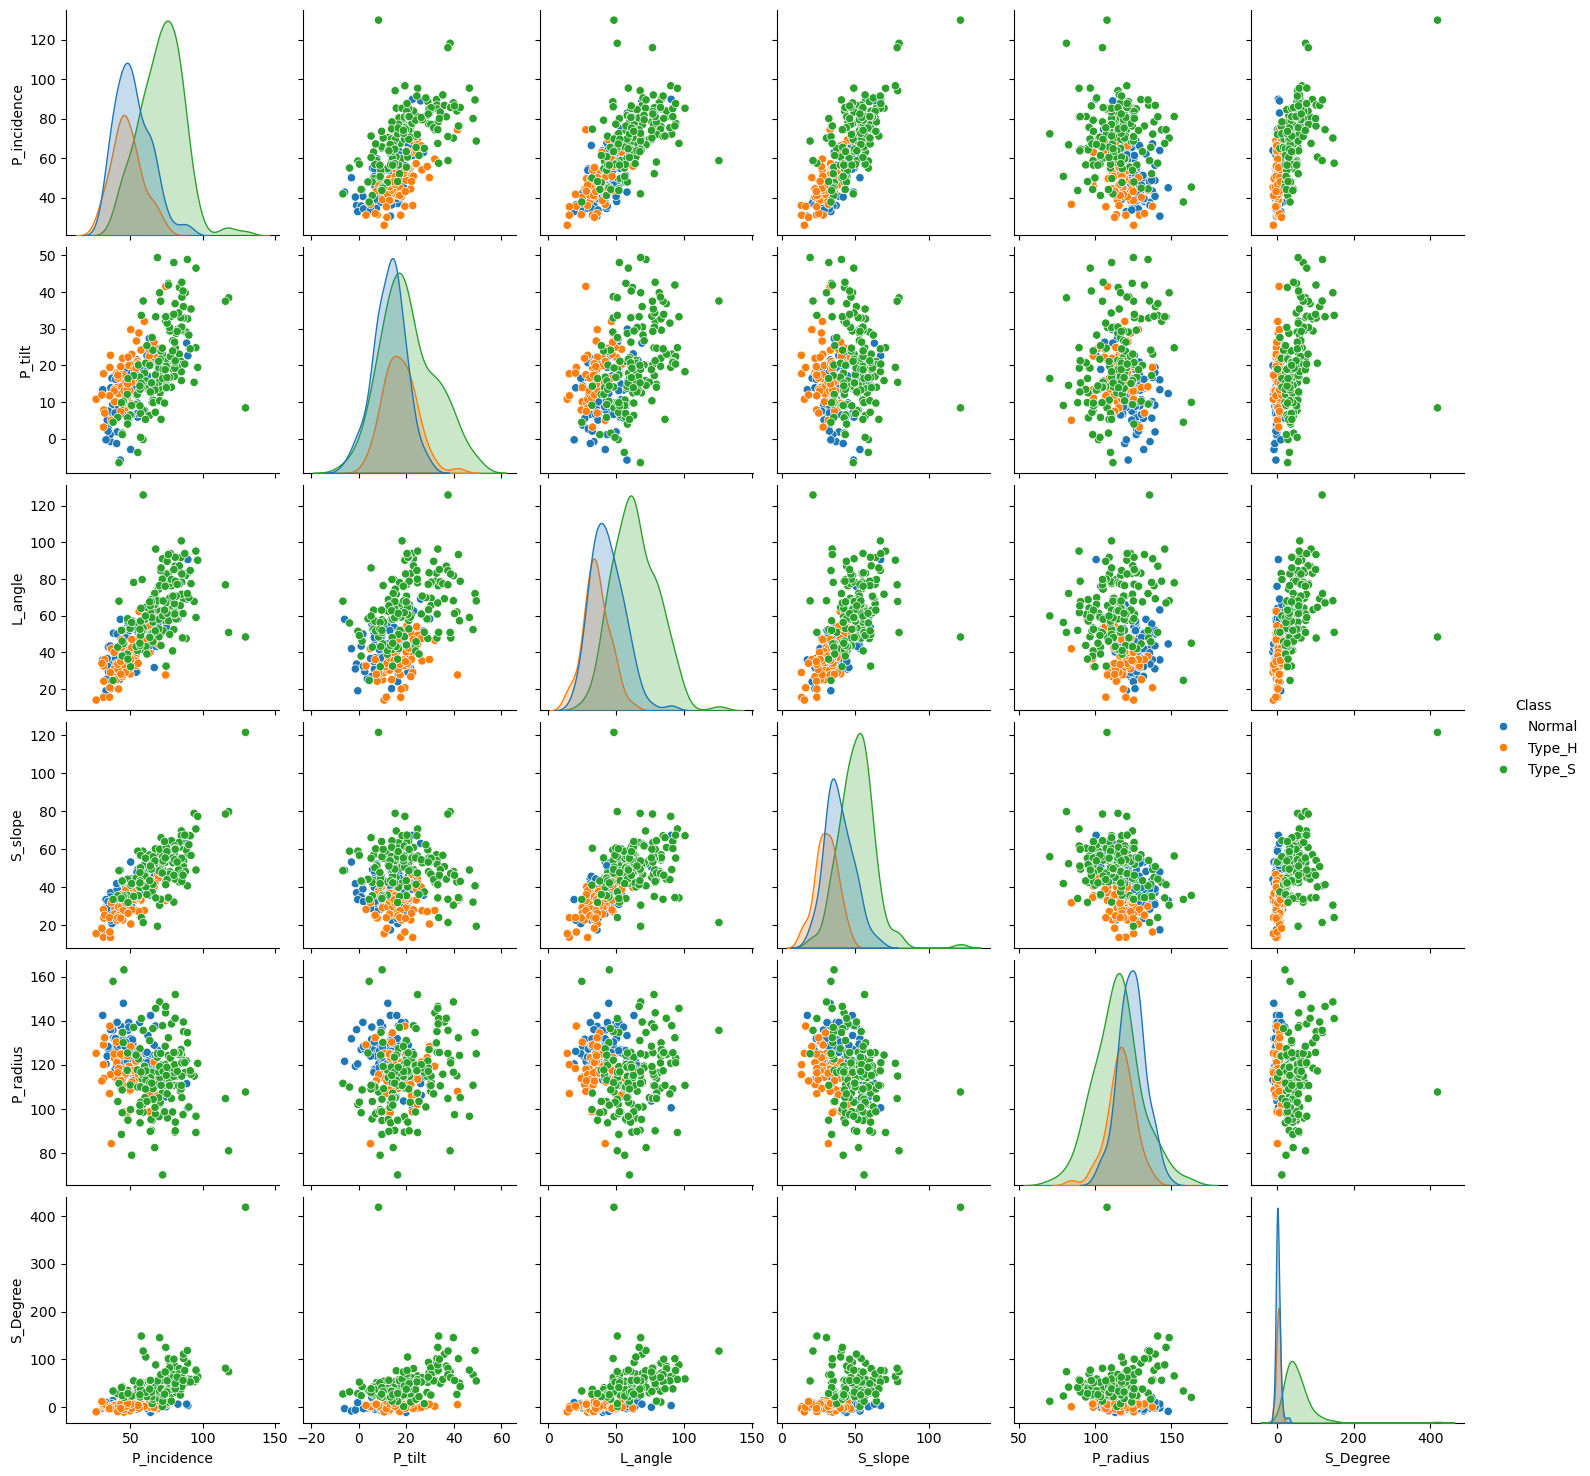

In [35]:
sns.pairplot(data=df, hue='Class', diag_kind='kde')

* *The pairplot **confirms the correlations** between the features as concluded from the heatmap*
* *All features show an **approximately normal distribution** when categorised by classes, even though they may **differ in their variances***.
* *The **variation** in the values for most features is **highest for the Type_S class***

### 1.3.d. Jointplot

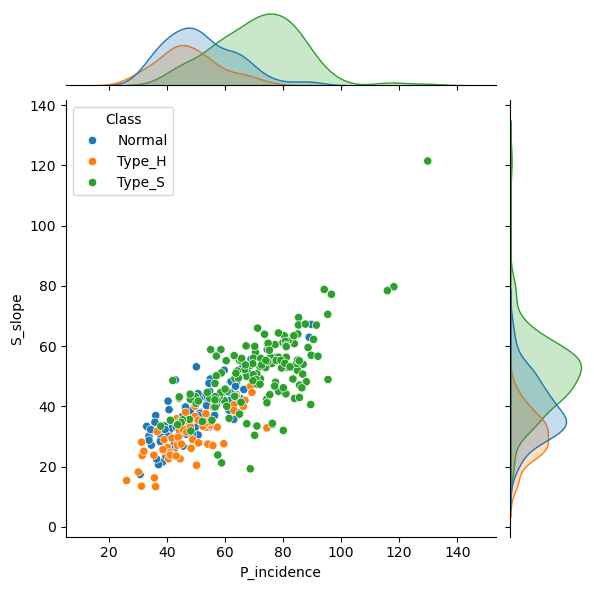

In [36]:
sns.jointplot(data=df, x='P_incidence', y='S_slope', hue='Class')

* *This shows a general **good positive correlation** between the features*
* *There is a **higher variation** in the values of this feature for **Type_S** as observed from the more **scattered green points with higher spread values***

### 1.3.e. Boxplot

<Axes: >

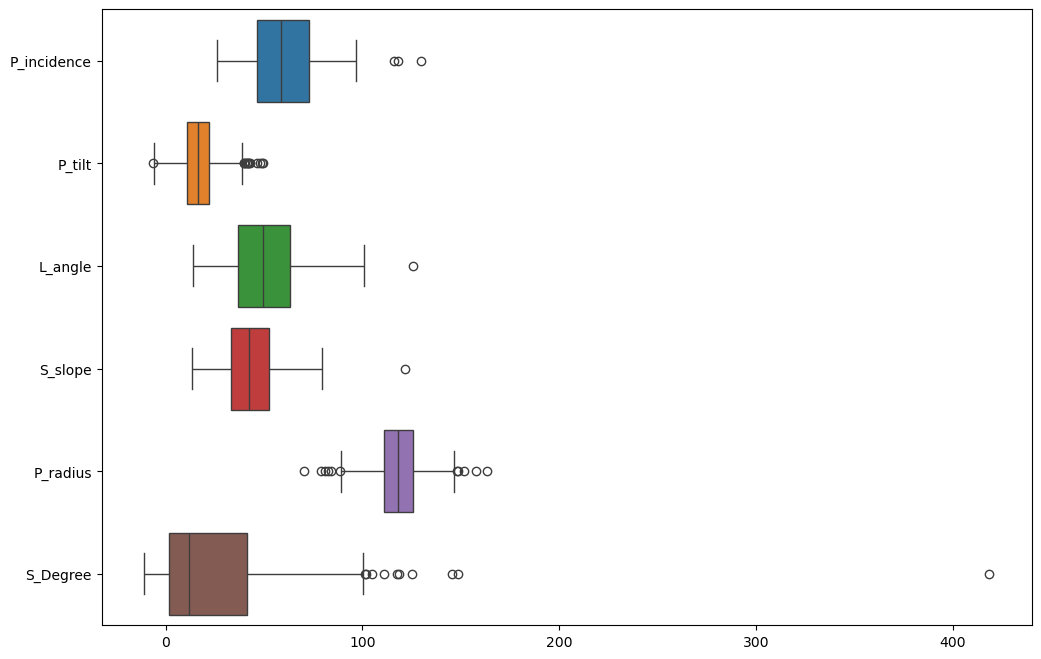

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')

* ***L_angle** and **S_slope** seems to have the **least number of outliers**. There is 1 **max outlier** each of the two features*
* ***S_Degree** has a **high max outlier** which seems out of the general range of the value of the feature** *The values for all the numerical fields seem to be fairly in the **range of 0-170***
* *There are **some negative values** for **P_tilt** and **S_Degree**. Based on the name of the columns they could refer to angles with respect to a certain axis and hence seem to be valid values.*

## Model Building

Before building model, we need to ensure that all the columns are represented in numeric values. Hence, the 'Class' feature needs to be label encoded into numerical categories

In [38]:
encoder = LabelEncoder()
df.loc[:,'Class'] = encoder.fit_transform(df.loc[:,'Class'])

In [39]:
df['Class'].value_counts()

Class
2    150
0    100
1     60
Name: count, dtype: int64

* *The 'Class' feature has been encoded as **0(Normal), 1(Type_H), 2(Type_S)***

### 1.4.a. Data split into features and target

In [40]:
#Class is target variable
y = df['Class'].astype('int64')
#X are the input features
X = df.iloc[:, :-1]

In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 310, dtype: int64

In [42]:
X

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629


### 1.4.b. Data split into training and testing set

In [43]:
#Split into train and test data with 80:20 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [44]:
X_train.shape

(248, 6)

In [45]:
y_train.shape

(248,)

In [46]:
X_test.shape

(62, 6)

In [47]:
y_test.shape

(62,)

* *The **total 310 data points** have been split into **248 train data points** and **62 test data points** respectively as indicated by the shape of the split data*

### 1.4.c. KNN Classifier

In [48]:
#classifer with k=3
knn3 = KNeighborsClassifier(n_neighbors=3)

#fit the model for the training data
knn3.fit(X_train, y_train)

#prediction on training data
y_pred_train = knn3.predict(X_train)

### 1.4.d. Performance metrics

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        79
           1       0.86      0.83      0.84        46
           2       0.99      0.95      0.97       123

    accuracy                           0.92       248
   macro avg       0.90      0.90      0.90       248
weighted avg       0.92      0.92      0.92       248



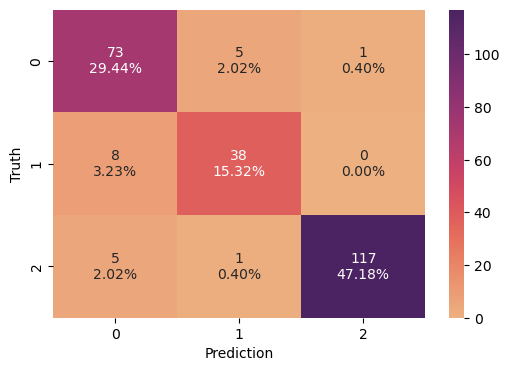

In [49]:
def confusion_matrix_map(model, target, predicted):
    cm = confusion_matrix(target, predicted)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, cmap="flare", fmt="")
    plt.ylabel("Truth")
    plt.xlabel("Prediction")
    
def model_performance(model, target, predicted):
    print('Confusion Matrix:')
    print(confusion_matrix_map(model, target, predicted))
    print('Classification Report:')
    print(classification_report(target, predicted))




#model performance on training data 
model_performance(knn3, y_train, y_pred_train)

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        21
           1       0.75      0.43      0.55        14
           2       0.93      0.96      0.95        27

    accuracy                           0.79        62
   macro avg       0.78      0.73      0.74        62
weighted avg       0.80      0.79      0.78        62



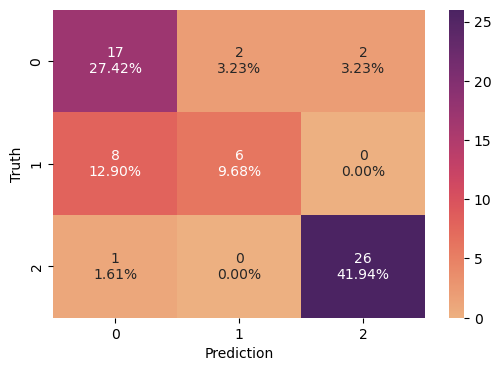

In [50]:
#prediction on test data
y_pred_test = knn3.predict(X_test)

##model performance on test data
model_performance(knn3, y_test, y_pred_test)

## Performance Improvement

### 1.5.a. Parameter Experimentation

We need to find the most optimal value of k that improves the performance metrics for all 'Class' values

In [51]:
#list of recall scores per target class
test_recall_0_score=[]
test_recall_1_score=[]
test_recall_2_score=[]
#list of precision scores per target class
test_precision_0_score=[]
test_precision_1_score=[]
test_precision_2_score=[]
#list of acccuracy scores
test_acc_score=[]
# odd number for neighbours from [1, 50)
neighbours = [k for k in np.arange(1, 50, 2)]
for n in neighbours:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    test_acc_score.append(accuracy_score(y_test, y_pred_test)) 
    rsc = recall_score(y_test, y_pred_test, average=None)
    test_recall_0_score.append(rsc[0])
    test_recall_1_score.append(rsc[1])
    test_recall_2_score.append(rsc[2])
    psc = precision_score(y_test, y_pred_test, average=None)
    test_precision_0_score.append(psc[0])
    test_precision_1_score.append(psc[1])
    test_precision_2_score.append(psc[2])

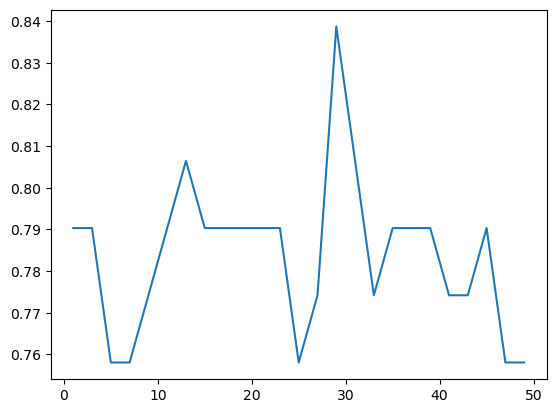

In [52]:
plt.plot(neighbours, test_acc_score)

* ***Highest accuracy of model seen around k in between 27-33***

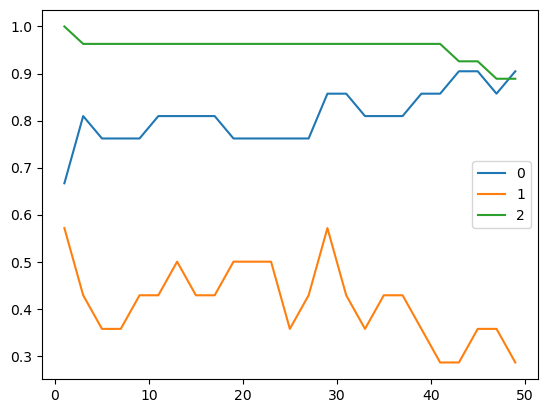

In [53]:
plt.plot(neighbours, test_recall_0_score)
plt.plot(neighbours, test_recall_1_score)
plt.plot(neighbours, test_recall_2_score)
plt.legend(['0', '1', '2'])
plt.show()

* ***Highest recall score peaks for all classes seen around k in between 27-33***

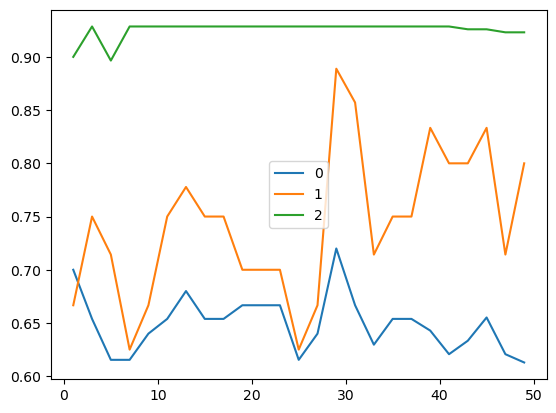

In [54]:
plt.plot(neighbours, test_precision_0_score)
plt.plot(neighbours, test_precision_1_score)
plt.plot(neighbours, test_precision_2_score)
plt.legend(['0', '1', '2'])
plt.show()

* ***Highest precision score peaks for all classes seen around k in between 27-33***

As we have nailed down fewer possible values for k, we can print classification report for each of the k values to arrive at the best value of k

In [55]:
#trying odd k values between 27 and 33
for n in np.arange(27, 33, 2):
    print("k = " + str(n))
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    print(classification_report(y_test, y_pred_test))

k = 27
              precision    recall  f1-score   support

           0       0.64      0.76      0.70        21
           1       0.67      0.43      0.52        14
           2       0.93      0.96      0.95        27

    accuracy                           0.77        62
   macro avg       0.75      0.72      0.72        62
weighted avg       0.77      0.77      0.77        62

k = 29
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        21
           1       0.89      0.57      0.70        14
           2       0.93      0.96      0.95        27

    accuracy                           0.84        62
   macro avg       0.85      0.80      0.81        62
weighted avg       0.85      0.84      0.83        62

k = 31
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        21
           1       0.86      0.43      0.57        14
           2       0.93      0.96      0.95        27


From the above **k = 29** seems to be the best value for our model. Let us compare with k=29 model on train data predictions as well

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        79
           1       0.72      0.50      0.59        46
           2       0.97      0.95      0.96       123

    accuracy                           0.84       248
   macro avg       0.80      0.77      0.78       248
weighted avg       0.85      0.84      0.84       248



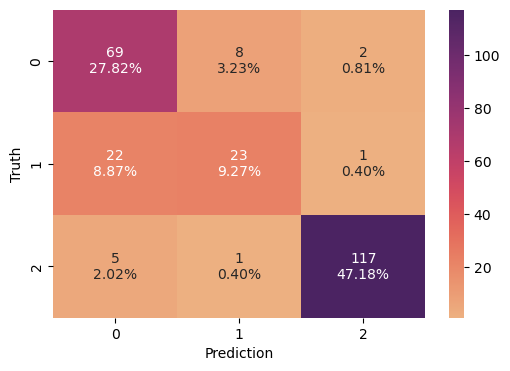

In [56]:
knn29 = KNeighborsClassifier(n_neighbors=29)

#run predictions on training data for validtion 
knn29.fit(X_train, y_train)
y_pred_train = knn29.predict(X_train)
print(classification_report(y_train, y_pred_train))
confusion_matrix_map(knn29, y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        21
           1       0.89      0.57      0.70        14
           2       0.93      0.96      0.95        27

    accuracy                           0.84        62
   macro avg       0.85      0.80      0.81        62
weighted avg       0.85      0.84      0.83        62



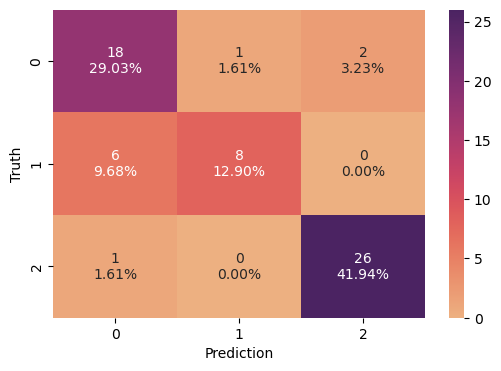

In [57]:
#run predictions on test data
y_pred_test = knn29.predict(X_test)
print(classification_report(y_test, y_pred_test))
confusion_matrix_map(knn29, y_test, y_pred_test)

*For **k=29***
* *The model has an **accuracy of 84% on the training data and 84% on the test data*** in general across classes
* *The model has **high values and extremely similar values of precision** for training and test data for **classes 0 and 2**. Class 1 has a lower precision value
* *The model has **high recall for Class 2 compared to Class 0 and 1**. However, all the recall scores have high significant values*
* *The model has **high f1 scores for classes 0 and 2**. It has has a significantly lower f1 score for Class 1 in training data than on the test data*

### 1.5.b. Performance improvement

In [58]:
#compare knn3 and knn29 model and calculate percentage values for all metrics
y_pred_test_3 = knn3.predict(X_test)
y_pred_test_29 = knn29.predict(X_test)
acc_score_improvement = (accuracy_score(y_pred_test_29, y_test)-accuracy_score(y_pred_test_3, y_test))/accuracy_score(y_pred_test_3, y_test) * 100
recall_score_0_improvement = (recall_score(y_pred_test_29, y_test, average=None)[0]-recall_score(y_pred_test_3, y_test, average=None)[0])/recall_score(y_pred_test_3, y_test, average=None)[0] * 100
recall_score_1_improvement = (recall_score(y_pred_test_29, y_test, average=None)[1]-recall_score(y_pred_test_3, y_test, average=None)[1])/recall_score(y_pred_test_3, y_test, average=None)[1] * 100
recall_score_2_improvement = (recall_score(y_pred_test_29, y_test, average=None)[2]-recall_score(y_pred_test_3, y_test, average=None)[2])/recall_score(y_pred_test_3, y_test, average=None)[2] * 100
recall_score_macro_improvement = (recall_score(y_pred_test_29, y_test, average='macro')-recall_score(y_pred_test_3, y_test, average='macro'))/recall_score(y_pred_test_3, y_test, average='macro') * 100
precision_score_0_improvement = (precision_score(y_pred_test_29, y_test, average=None)[0]-precision_score(y_pred_test_3, y_test, average=None)[0])/precision_score(y_pred_test_3, y_test, average=None)[0] * 100
precision_score_1_improvement = (precision_score(y_pred_test_29, y_test, average=None)[1]-precision_score(y_pred_test_3, y_test, average=None)[1])/precision_score(y_pred_test_3, y_test, average=None)[1] * 100
precision_score_2_improvement = (precision_score(y_pred_test_29, y_test, average=None)[2]-precision_score(y_pred_test_3, y_test, average=None)[2])/precision_score(y_pred_test_3, y_test, average=None)[2] * 100
precision_score_macro_improvement = (precision_score(y_pred_test_29, y_test, average='macro')-precision_score(y_pred_test_3, y_test, average='macro'))/precision_score(y_pred_test_3, y_test, average='macro') * 100
print('Accuracy: ' + str(round(acc_score_improvement, 2)) + '% improvement\n')
print('Recall Score Macro: ' + str(round(recall_score_macro_improvement, 2)) + '% improvement')
print('Recall Score for Class 0: ' + str(round(recall_score_0_improvement, 2)) + '% improvement')
print('Recall Score for Class 1: ' + str(round(recall_score_1_improvement, 2)) + '% improvement')
print('Recall Score for Class 2: ' + str(round(recall_score_2_improvement, 2)) + '% improvement\n')
print('Precision Score Macro: ' + str(round(precision_score_macro_improvement, 2)) + '% improvement')
print('Precision Score for Class 0: ' + str(round(precision_score_0_improvement, 2)) + '% improvement')
print('Precision Score for Class 1: ' + str(round(precision_score_1_improvement, 2)) + '% improvement')
print('Precision Score for Class 2: ' + str(round(precision_score_2_improvement, 2)) + '% improvement')


Accuracy: 6.12% improvement

Recall Score Macro: 8.79% improvement
Recall Score for Class 0: 10.12% improvement
Recall Score for Class 1: 18.52% improvement
Recall Score for Class 2: 0.0% improvement

Precision Score Macro: 8.65% improvement
Precision Score for Class 0: 5.88% improvement
Precision Score for Class 1: 33.33% improvement
Precision Score for Class 2: 0.0% improvement


* *The model for k=29 has shown a **6.12% improvement in accuracy** over k=3*
* *The model for k=29 has shown a **8.79% improvement in macro recall score** over k=3*
* *The model for k=29 has shown a **8.65% improvement in macro percision score** over k=3*
* *The model for k=29 has shown **positive % improvements in the recall and precision scores for Class 0 and 1***
* *The model for k=29 has shown **negligible improvements in the recall and precision scores for Class 2***

### 1.5.c. Parameter contribution to performance improvement

* *In the above experiment the value of **'k'** is the parameter that has helped most in improving the model performance. In this case default values of **metric='Minkowski' and p=2** have been used while initialising the KNeighboursClassifier. Hence, the distance measure defaults to **Euclidean distance.***

# PART - B

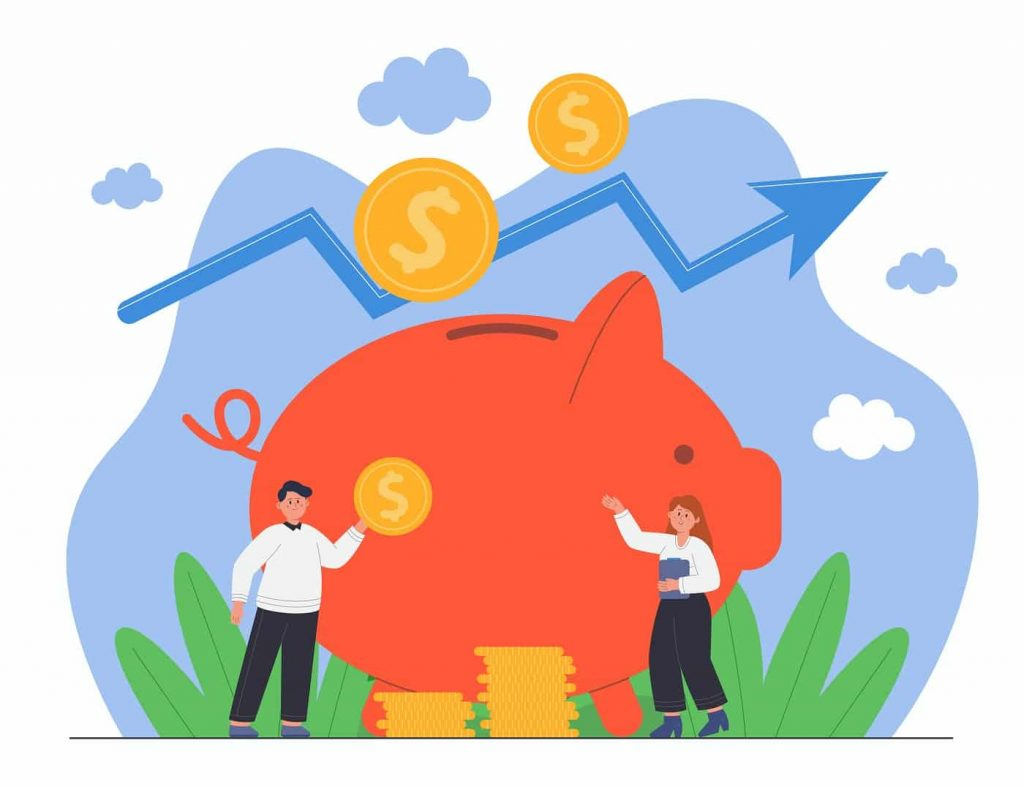

**DOMAIN** : Banking, Marketing

**CONTEXT**: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base where majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

**PROJECT OBJECTIVE**: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert 
using the historical dataset.

In [59]:
%cd C:\Users\ajays\Dropbox\PGP-AIML\projects\supervisedlearning

C:\Users\ajays\Dropbox\PGP-AIML\projects\supervisedlearning


## Data Understanding and Preparation

### 2.1.a. Read the dataframes

In [60]:
df_data1 = pd.read_csv('Data1.csv')
df_data2 = pd.read_csv('Data2.csv')

In [61]:
df_data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [62]:
df_data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


### 2.1.b. Structure and shape of the dataframes

In [63]:
df_data1.shape

(5000, 8)

In [64]:
df_data2.shape

(5000, 7)

In [65]:
df_data1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [66]:
df_data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [67]:
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [68]:
df_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


* *The 2 dataframes **can be merged on ID column** as it is the common label in two dataframes and **row size of both the dataframes is 5000***

### 2.1.c. Dataframe unification

In [69]:
df = pd.merge(df_data1, df_data2, on='ID')

In [70]:
df.shape

(5000, 14)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [72]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


### 2.1.d. Data type handling

In [73]:
#converting binary features to object type
df['CreditCard'] = df['CreditCard'].astype('object')
df['InternetBanking'] = df['InternetBanking'].astype('object')
df['FixedDepositAccount'] = df['FixedDepositAccount'].astype('object')
df['Security'] = df['Security'].astype('object')
df['Level'] = df['Level'].astype('object')
df['HiddenScore'] = df['HiddenScore'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


## Data Exploration and Analysis

### 2.2.a. Visualization

Checking the distribution of LoanOnCard feature, we have:

In [74]:
df['LoanOnCard'].value_counts()

LoanOnCard
0.0    4500
1.0     480
Name: count, dtype: int64

<Axes: xlabel='LoanOnCard', ylabel='count'>

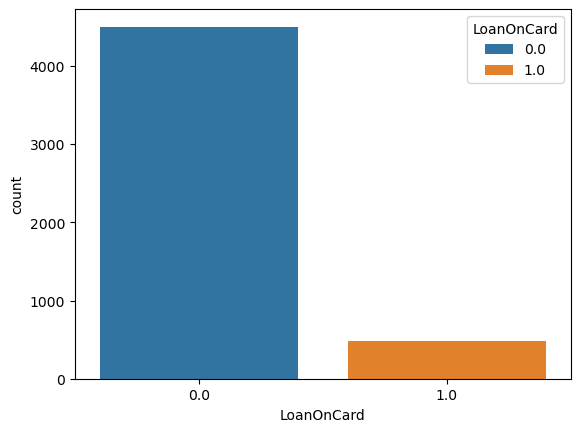

In [75]:
sns.countplot(data=df, x='LoanOnCard', hue='LoanOnCard')

In [76]:
df['LoanOnCard'].value_counts(normalize=True)

LoanOnCard
0.0    0.903614
1.0    0.096386
Name: proportion, dtype: float64

* *There are **only 4980 values for LoanOnCard** whereas there are 5000 rows, which means that **20 rows have missing values** for the feature*
* ***90.4% of the customers do not have a loan on their card***

In [77]:
df.isna().sum()/df.shape[0] * 100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

* ***0.4%** of the data rows has **missing values for LoanOnCard feature***
* *LoanOnCard is a **binary feature** and should have a 0 or 1. A missing value probably indicates that the customer does not have a loan on the credit card as this variable was not updated in original data. **We can impute the NaN data to 0***.

### 2.2.b. Handle missing values

In [78]:
#impute LonOnCard=NaN to 0
df['LoanOnCard'].fillna(0.0, inplace=True)
df.isna().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

### 2.2.c. Handle unexpected values

Checking each categorical feature for unexpected values

In [79]:
df['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [80]:
df['InternetBanking'].value_counts()

InternetBanking
1    2984
0    2016
Name: count, dtype: int64

In [81]:
df['FixedDepositAccount'].value_counts()

FixedDepositAccount
0    4698
1     302
Name: count, dtype: int64

In [82]:
df['Security'].value_counts()

Security
0    4478
1     522
Name: count, dtype: int64

In [83]:
df['Level'].value_counts()

Level
1    2096
3    1501
2    1403
Name: count, dtype: int64

In [84]:
df['HiddenScore'].value_counts()

HiddenScore
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

* *The categories seem to be **labelled as whole numbers** which seems to be valid expected data*

## Data Preparation and Model Building

### 2.3.a. Data split into features and target

Features ID and ZipCode are not useful to build the model and can be safely dropped

In [85]:
df.drop(columns=['ID','ZipCode'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   HiddenScore          5000 non-null   object 
 4   MonthlyAverageSpend  5000 non-null   float64
 5   Level                5000 non-null   object 
 6   Mortgage             5000 non-null   int64  
 7   Security             5000 non-null   object 
 8   FixedDepositAccount  5000 non-null   object 
 9   InternetBanking      5000 non-null   object 
 10  CreditCard           5000 non-null   object 
 11  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 468.9+ KB


In [86]:
#X = features
X = df.iloc[:, :-1]
X

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [87]:
#y = target
y = df['LoanOnCard']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: LoanOnCard, Length: 5000, dtype: float64

### 2.3.b. Data split into training and testing set

In [88]:
#split into training and test data in 75:25 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [89]:
X_train.shape

(3750, 11)

In [90]:
X_test.shape

(1250, 11)

In [91]:
y_train.shape

(3750,)

In [92]:
y_test.shape

(1250,)

### 2.3.c. Logistic Regression

In [93]:
lr_model = LogisticRegression()
#fit on train
lr_model.fit(X_train, y_train)
#predict on test
y_pred_test = lr_model.predict(X_test)
disp_df = pd.DataFrame()
for i in range(0, X_train.shape[1]):
    disp_df['Coeff of '+ X_train.columns[i]] = [lr_model.coef_[0][i]]
disp_df['intercept'] = lr_model.intercept_
disp_df

,Coeff of Age,Coeff of CustomerSince,Coeff of HighestSpend,Coeff of HiddenScore,Coeff of MonthlyAverageSpend,Coeff of Level,Coeff of Mortgage,Coeff of Security,Coeff of FixedDepositAccount,Coeff of InternetBanking,Coeff of CreditCard,intercept
0,-0.499643,0.504626,0.051365,0.647233,0.102045,1.707446,0.000274,0.198963,2.534353,-0.476559,-0.548124,-0.426644


### 2.3.d. lr_model Performance Metrics

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      3380
         1.0       0.82      0.62      0.71       370

    accuracy                           0.95      3750
   macro avg       0.89      0.80      0.84      3750
weighted avg       0.95      0.95      0.95      3750



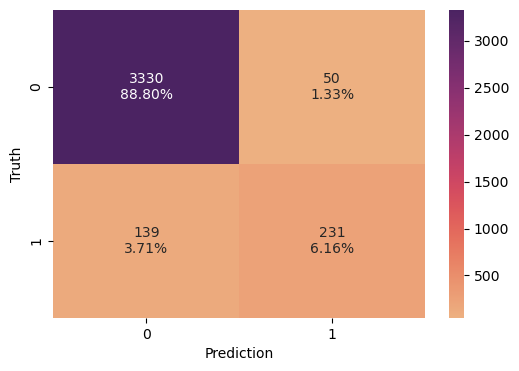

In [94]:
#model performance on training data
y_pred_train = lr_model.predict(X_train)
model_performance(lr_model, y_train, y_pred_train)

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1140
         1.0       0.82      0.55      0.66       110

    accuracy                           0.95      1250
   macro avg       0.89      0.77      0.82      1250
weighted avg       0.95      0.95      0.95      1250



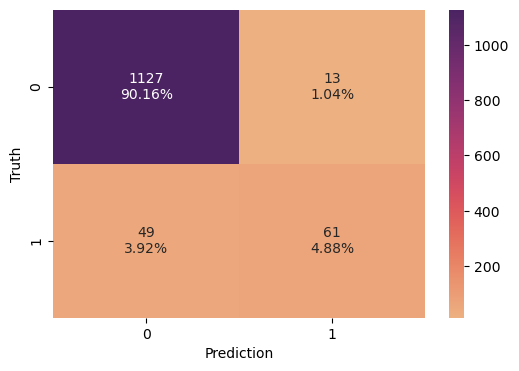

In [95]:
#model performance on test data
y_pred_test = lr_model.predict(X_test)
model_performance(lr_model, y_test, y_pred_test)

* *The data is **highly skewed towards the LoanOnCard = 0** feature value. Hence the model has a **very high accuracy score on training and test data but may not be very useful***

### 2.3.e. Data balancing

The current skew on LoanOnCard feature is about 90:10 in favour of 0 value. We need to bring this to 50:50 by the **SMOTE oversampling method by generating synthetic samples for the LoanOnCard = 1 samples**

In [96]:
y_train.value_counts()

LoanOnCard
0.0    3380
1.0     370
Name: count, dtype: int64

In [97]:
X_train.shape

(3750, 11)

In [98]:
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [99]:
y_train_sm.value_counts()

LoanOnCard
1.0    3380
0.0    3380
Name: count, dtype: int64

In [100]:
X_train_sm.shape

(6760, 11)

### 2.3.f. Retraining

In [101]:
lr_model = LogisticRegression()
#fit on SMOTEd train
lr_model.fit(X_train_sm, y_train_sm)
#predict on test
y_pred_test = lr_model.predict(X_test)
disp_df = pd.DataFrame()
for i in range(0, X_train.shape[1]):
    disp_df['Coeff of '+ X_train.columns[i]] = [lr_model.coef_[0][i]]
disp_df['intercept'] = lr_model.intercept_
disp_df

,Coeff of Age,Coeff of CustomerSince,Coeff of HighestSpend,Coeff of HiddenScore,Coeff of MonthlyAverageSpend,Coeff of Level,Coeff of Mortgage,Coeff of Security,Coeff of FixedDepositAccount,Coeff of InternetBanking,Coeff of CreditCard,intercept
0,-0.421069,0.427799,0.051233,0.517898,0.305046,1.471726,0.000028,0.093421,0.943121,-0.217779,-0.125753,-0.139298


In [ ]:
#confusion matrix on SMOTEd training data
y_pred_train = lr_model.predict(X_train_sm)
model_performance(lr_model, y_train_sm, y_pred_train)

In [ ]:
#confusion matrix on test data
model_performance(lr_model, y_test, y_pred_test)

### 2.3.g. Revaluation and Comparison

*Comparing confusion matrices and classification reports for cells, we find:*
* ***Accuracy dipped from <font color='red'>95% -> 88%</font>***
* ***Precision for LoanOnCard = 0 increased from <font color='green'>96% -> 99%</font>***
* ***Precision for LoanOnCard = 1 dipped from <font color='red'>82% -> 42%</font>***
* ***Recall for LoanOnCard = 0 dipped from <font color='red'>99% -> 88%</font>***
* ***Recall for LoanOnCard = 1 increased from <font color='green'>55% -> 87%</font>***
* ***F1 score for LoanOnCard = 0 dipped from <font color='red'>97% -> 93%</font>***
* ***F1 score for LoanOnCard = 1 dipped from <font color='red'>66% -> 57%</font>***


## Performance Improvement

### 2.4.a. SVM, KNN

#### Base KNN model with default k=5

In [ ]:
#classifer with default k=5
knn_default = KNeighborsClassifier()

#fit the model for the training data
knn_default.fit(X_train, y_train)

In [ ]:
#prediction on training data
y_pred_train = knn_default.predict(X_train)

#model performance on training data 
model_performance(knn_default, y_train, y_pred_train)

In [ ]:
#prediction on test data
y_pred_test = knn_default.predict(X_test)

##model performance on test data
model_performance(knn_default, y_test, y_pred_test)

#### Base SVM model with default gamma='scale' and default C=1

In [ ]:
svc_default = SVC()
svc_default.fit(X_train, y_train)

In [ ]:
#prediction on training data
y_pred_train = svc_default.predict(X_train)

#model performance on training data 
model_performance(svc_default, y_train, y_pred_train)

In [ ]:
#prediction on test data
y_pred_test = svc_default.predict(X_test)

##model performance on test data
model_performance(svc_default, y_test, y_pred_test)

### 2.4.b. Parameter tuning

#### Tuning for KNN

In [ ]:
#list of recall scores per target class
test_recall_0_score=[]
test_recall_1_score=[]
#list of precision scores per target class
test_precision_0_score=[]
test_precision_1_score=[]
#list of accuracy scores
test_acc_score=[]
# odd number for neighbours from [1, 100)
neighbours = [k for k in np.arange(1, 100, 2)]
for n in neighbours:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    test_acc_score.append(accuracy_score(y_test, y_pred_test)) 
    rsc = recall_score(y_test, y_pred_test, average=None)
    test_recall_0_score.append(rsc[0])
    test_recall_1_score.append(rsc[1])
    psc = precision_score(y_test, y_pred_test, average=None)
    test_precision_0_score.append(psc[0])
    test_precision_1_score.append(psc[1])

In [ ]:
plt.plot(neighbours, test_acc_score)

In [ ]:
plt.plot(neighbours, test_recall_0_score)
plt.plot(neighbours, test_recall_1_score)
plt.legend(['0', '1'])
plt.show()

In [ ]:
plt.plot(neighbours, test_precision_0_score)
plt.plot(neighbours, test_precision_1_score)
plt.legend(['0', '1'])
plt.show()

* *As the problem is related to **targeted marketing**, we are interested in knowing whether we can **identify potential customers (LoanOnCard = 1)** because these will potentially bring in **more business to the bank**. We want to **avoid predicting 0 when truth = 1**, hence we want to **avoid false negatives**. So **precision becomes a dominating factor** in determining the best model.*
* *KNN is showing **highest precision values throughout for Class 0**. However, for values of **k near 40-50, the values for precision has high peaks.***
* *Near the same **range of k between 40-50, we are seeing higher recall values** than any k value greater than this range.*
* *Near the same range of **k between 40-50, we are seeing highest accuracy values***
* ***Recall values are continuously dropping as k increases**. Hence it is best to choose as low k value as possible that shows high precision values.*

In [ ]:
for n in np.arange(41, 50, 2):
    print("k = " + str(n))
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    print(classification_report(y_test, y_pred_test))

* *From the above reports we can conclude that **k=43 is the best value** for the KNN model*

#### Tuning for SVM

In [ ]:
#Hyperparameter tuning using Gridsearch
svm = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(svm, param_grid)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
svc = SVC(gamma=0.0001, C=1000)
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)
#model performance on test data
model_performance(svc, y_test, y_pred_test)

In [ ]:
#model performance on training data
y_pred_train = svc.predict(X_train)
model_performance(svc, y_train, y_pred_train)

### 2.4.c. Performance metrics

*So far we have built 3 tuned models for our problem:*
* *Logistic regression model after data balancing*
* *Tuned KNN model for k=43*
* *Tuned SVM RBF kernel model with C=1000 and gamma=0.0001*

*We will now conclude on a model depending on high accuracy, precision, recall as needed depending on the problem characteristics.*

In [ ]:
#logistic regression model performance on test data
y_pred_test = lr_model.predict(X_test)
model_performance(lr_model, y_test, y_pred_test)

In [ ]:
#Tuned knn model's performance with k=43
knn43 = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
model_performance(lr_model, y_test, y_pred_test)

In [ ]:
svc = SVC(gamma=0.0001, C=1000)
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)
model_performance(svc, y_test, y_pred_test)

* *Based on the above findings, **we will choose the Tuned SVM model** to predict the customer conversion for the bank*
* *The tuned SVM model has a **high accuracy of 97%** and **high precision score of 97% and 94% respectively for classes LoanOnCard as 0 and 1***.
* *It also has **almost perfect recall for LoanOnCard=0 class** and has a decent **recall of 71% for LoanOnCard=1 class***

### 2.4.d. Performance improvement

*Comparing confusion matrices and classification reports for original base SVM model with default values and tuned RBF SVM model on test data, we find that:*
* ***Accuracy increased from <font color='green'>92% -> 97%</font>***
* ***Precision for LoanOnCard = 0 increased from <font color='green'>92% -> 97%</font>***
* ***Precision for LoanOnCard = 1 increased from <font color='green'>64% -> 94%</font>***
* ***Recall for LoanOnCard = 0 increased from <font color='green'>99% -> ~100%%</font>***
* ***Recall for LoanOnCard = 1 increased from <font color='green'>8% -> 71%</font>***
* ***F1 score for LoanOnCard = 0 increased from <font color='green'>96% -> 98%</font>***
* ***F1 score for LoanOnCard = 1 increased from <font color='green'>15% -> 81%</font>***

*Comparing confusion matrices and classification reports for cells original Logistic Regression model and tuned SVM model on test data, we find that:*
* ***Accuracy increased from <font color='green'>89% -> 97%</font>***
* ***Precision for LoanOnCard = 0 dipped from <font color='red'>99% -> 97%</font>***
* ***Precision for LoanOnCard = 1 increased from <font color='green'>43% -> 94%</font>***
* ***Recall for LoanOnCard = 0 increased from <font color='green'>89% -> ~100%%</font>***
* ***Recall for LoanOnCard = 1 dipped from <font color='red'>87% -> 71%</font>***
* ***F1 score for LoanOnCard = 0 increased from <font color='green'>93% -> 98%</font>***
* ***F1 score for LoanOnCard = 1 increased from <font color='green'>57% -> 81%</font>***
